In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/IFIC.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
0  437 2018-05-08         IFIC  11.3  ...  11.4  280.0      10.865   967908.0
1  436 2018-06-08         IFIC  11.0  ...  11.2  305.0      10.966   986650.0
2  435 2018-07-08         IFIC  11.4  ...  11.1  340.0      16.799  1481820.0
3  434 2018-08-08         IFIC  11.2  ...  11.4  480.0      21.930  1936588.0
4  433 2018-09-08         IFIC  11.8  ...  11.3  637.0      21.676  1860179.0

[5 rows x 12 columns]

In [3]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)    VOLUME
36  401 2018-01-10         IFIC  10.9  ...  10.9  188.0       5.272  478227.0
59  378 2018-01-11         IFIC  10.5  ...  10.6  221.0       8.007  759217.0
37  400 2018-02-10         IFIC  11.1  ...  11.0  171.0       4.452  403336.0
79  358 2018-02-12         IFIC  10.4  ...  10.3  123.0       2.755  265026.0
16  421 2018-03-09         IFIC  12.3  ...  12.5  325.0       8.032  649043.0

[5 rows x 12 columns]

In [4]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)    VOLUME
DATE                                      ...                                   
2018-01-10  401         IFIC  10.9  11.2  ...  10.9  188.0       5.272  478227.0
2018-01-11  378         IFIC  10.5  10.7  ...  10.6  221.0       8.007  759217.0
2018-02-10  400         IFIC  11.1  11.1  ...  11.0  171.0       4.452  403336.0

[3 rows x 11 columns]

In [5]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [6]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [7]:
df['volatility'] = df['volatility']*100

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df=df.reset_index()['volatility']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df.shape

(437, 1)

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

training_size,test_size

(305, 132)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:



#1D cnn model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 72ms/step - loss: 0.1504 - val_loss: 0.0443
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0252 - val_loss: 0.0144
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0204 - val_loss: 0.0461
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0196 - val_loss: 0.0163
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0349
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0131 - val_loss: 0.0312
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0079 - val_loss: 0.0355
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0078 - val_loss: 0.0443
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.0370
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0381
Epoch 11/100
7/7 [===

In [19]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [20]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [22]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

1.9080494640085166

In [23]:

Y_test


array([[4.58115419],
       [4.2593311 ],
       [4.26914818],
       [3.55486394],
       [2.87643025],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [2.8892225 ],
       [3.38677387],
       [3.43254067],
       [3.66038087],
       [3.69340541],
       [3.53517054],
       [3.79848492],
       [3.80693873],
       [3.80693873],
       [3.99880548],
       [4.06286603],
       [4.18981249],
       [4.89480346],
       [5.04447593],
       [5.20561237],
       [5.57673799],
       [5.58516809],
       [5.78570391]])

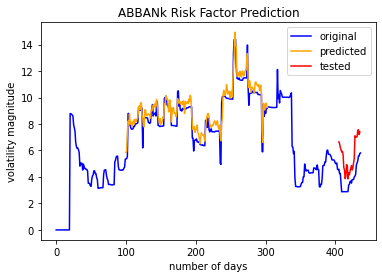

In [24]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [25]:
len(test_data)

132

In [26]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [27]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [28]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.5384864]
101
1 day input [0.43685104 0.43422647 0.40007859 0.41190475 0.27327404 0.22803036
 0.22739779 0.22739779 0.22555281 0.22575179 0.22575179 0.2263466
 0.22805717 0.24212047 0.24835873 0.24878135 0.27822936 0.27822936
 0.34556545 0.32258158 0.30869004 0.31233112 0.31221835 0.31318367
 0.29971782 0.29823373 0.29781201 0.29950354 0.29950354 0.29911603
 0.29913398 0.32487736 0.32482367 0.32378636 0.31709756 0.31620834
 0.34057677 0.31546526 0.31587207 0.22731775 0.2244275  0.23980155
 0.23814884 0.26845724 0.336048   0.33799724 0.33835193 0.35658267
 0.35570079 0.39165964 0.41792211 0.41777084 0.39660336 0.39660336
 0.39660336 0.3892219  0.38400119 0.36730751 0.36697666 0.36661205
 0.36661205 0.3595004  0.34820568 0.34721496 0.35062068 0.31835368
 0.31565551 0.31790804 0.29557521 0.29625646 0.24668889 0.19960915
 0.20049687 0.20049687 0.20049687 0.20049687 0.20049687 0.20049687
 0.20049687 0.20049687 0.20049687 0.23502432 0.23820029 0.25401121
 0.25630294 0.24532227 0.2635949  0

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [31]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

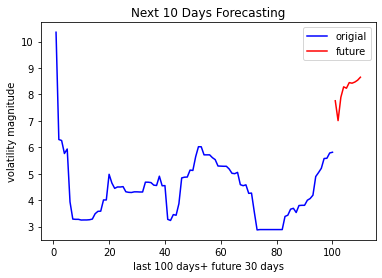

In [33]:

plt.plot(day_new,scaler.inverse_transform(df[337:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

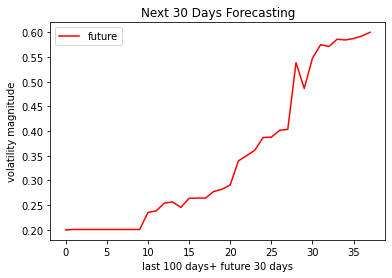

In [34]:



df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [35]:
df3=scaler.inverse_transform(df3).tolist()

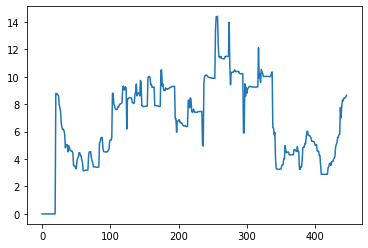

In [36]:
plt.plot(df3)